In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import uniform


In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
train_data.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,425.401667,19.839650,0.388164,0.283306,0.486137,0.590437,82.225280,49.706467,68.703440,59.266920,28.679893,48.600793,18.795525,0.327030,0.499020,0.445017,35.999411,5992.770342
std,4330.271354,215.091453,6.676577,0.345423,0.058527,0.149795,0.147317,9.109746,5.522788,7.610237,6.583907,3.182278,5.368383,11.837961,0.166279,0.077344,0.038247,4.115489,1356.343165
min,0.000000,0.000000,12.500000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,45.800000,24.300000,41.200000,1.000000,0.060000,0.163671,0.207564,22.079199,1637.704020
25%,3749.750000,244.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.450103,0.417909,33.221987,5046.457340
50%,7499.500000,468.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.502980,0.445494,35.923314,6075.959845
75%,11249.250000,596.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559325,0.471189,38.848807,7007.668250
max,14999.000000,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,34.000000,55.900000,34.000000,0.560000,0.867539,0.631790,46.369344,8969.401840


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [5]:
# removing any null values
train_data.dropna()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,683.0,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.383582,0.399556,30.546306,3923.90628
1,1,330.0,12.5,0.25,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.480073,0.448973,35.598217,5596.22636
2,2,155.0,12.5,0.25,0.25,0.38,0.38,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.594206,0.495898,41.059194,7406.90248
3,3,293.0,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.572046,0.486486,39.773462,7270.31832
4,4,343.0,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.532304,0.460322,37.209554,6132.99793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,58.0,12.5,0.25,0.25,0.38,0.25,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.385022,0.372179,29.248678,4016.36160
14996,14996,340.0,12.5,0.25,0.25,0.75,0.75,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.620392,0.528322,43.242047,8013.62631
14997,14997,722.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.619888,0.512639,45.069192,8413.65966
14998,14998,367.0,12.5,0.25,0.38,0.38,0.50,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.582491,0.492820,41.176421,7183.10038


In [6]:
# identifing the use full features
useful_features = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
                   'MaxOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange',
                   'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays',
                   'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']

In [7]:
# adding new feature / engineering new features
train_data['TempRangeUpper'] = train_data['MaxOfUpperTRange'] - train_data['AverageOfUpperTRange']
train_data['TempRangeLower'] = train_data['MaxOfLowerTRange'] - train_data['MinOfLowerTRange']

train_data['TotalBees'] = train_data['honeybee'] + train_data['bumbles'] + train_data['andrena'] + train_data['osmia']
train_data['WildToManagedBeeRatio'] = (train_data['bumbles'] + train_data['andrena'] + train_data['osmia']) / (train_data['honeybee'] + 1)

train_data['RainStability'] = train_data['RainingDays'] - train_data['AverageRainingDays']
train_data['PollinationEfficiency'] = train_data['fruitset'] / (train_data['TotalBees'] + 1)

train_data['MassPerSeed'] = train_data['fruitmass'] / (train_data['seeds'] + 1)
train_data['SeedEfficiency'] = train_data['seeds'] / (train_data['fruitset'] + 1)
train_data['RainToPollinatorRatio'] = (train_data['RainingDays'] + train_data['AverageRainingDays']) / (train_data['TotalBees'] + 1)
temp_features=['TempRangeUpper', 'TempRangeLower', 'TotalBees', 'WildToManagedBeeRatio',
    'RainStability', 'PollinationEfficiency', 'MassPerSeed', 'SeedEfficiency', 'RainToPollinatorRatio']

In [8]:
# final list of features
features=useful_features+temp_features
# target field
target = ['yield']

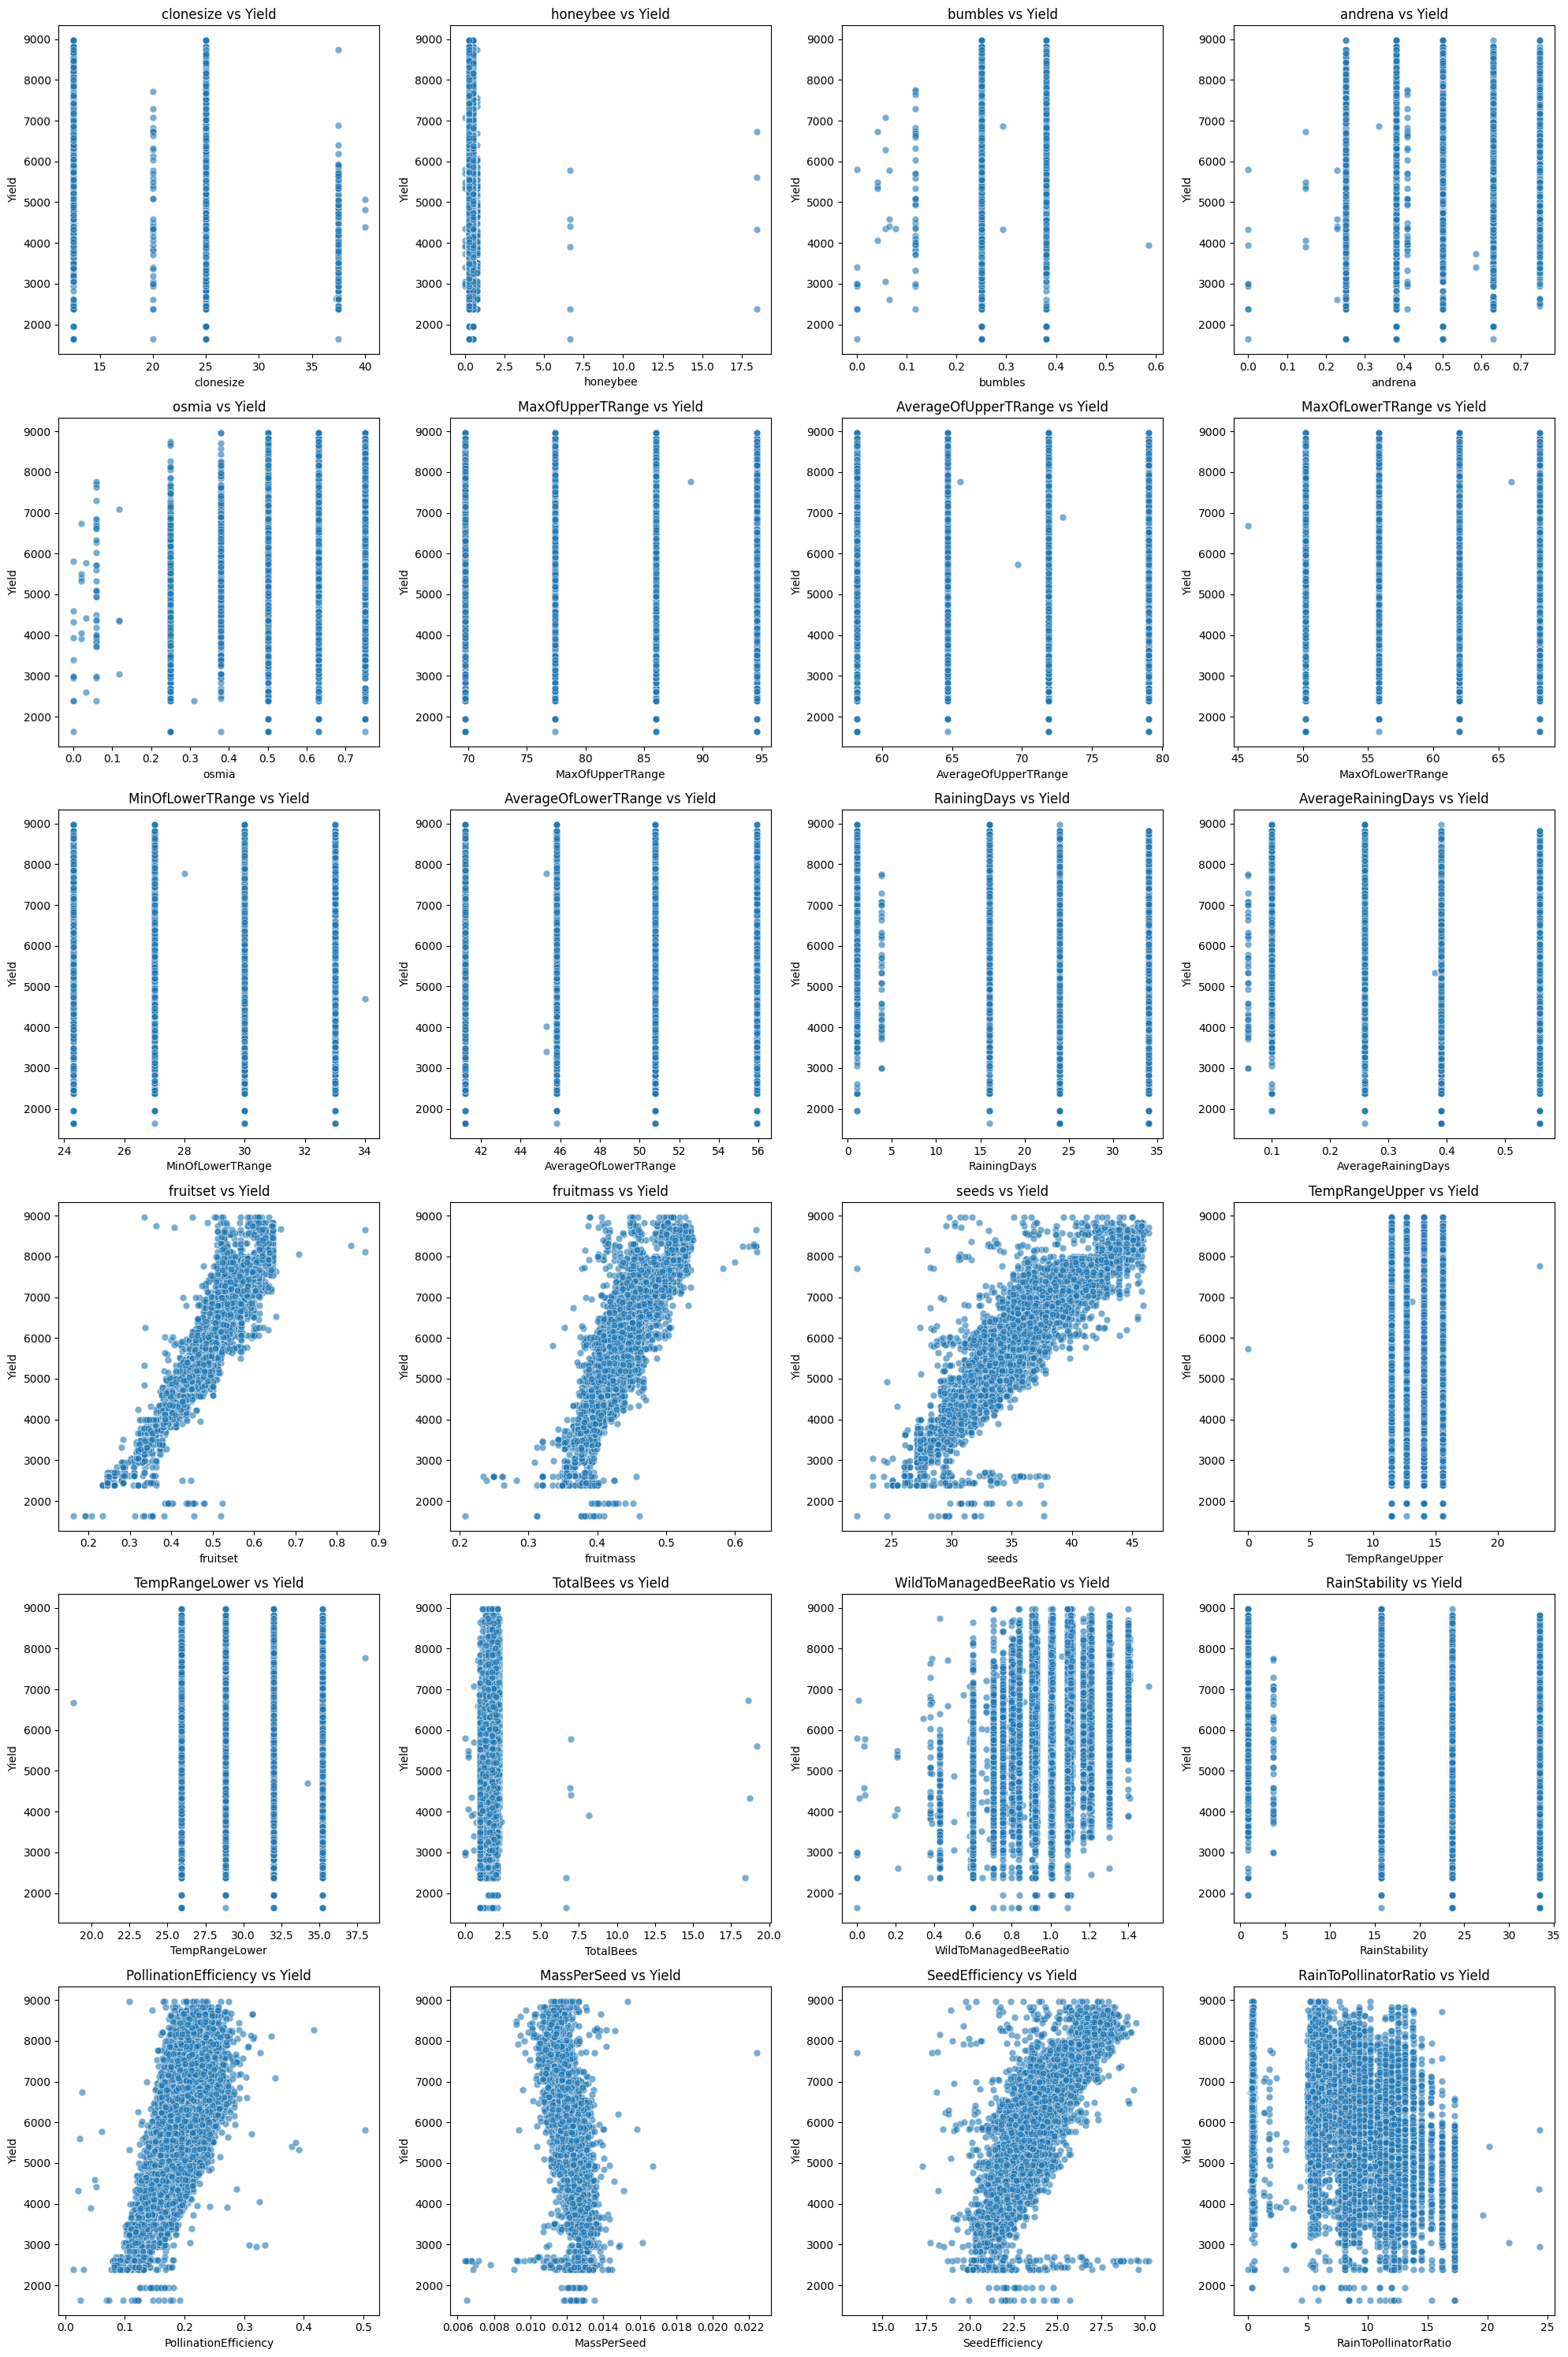

In [9]:
# ploting graphs / visualizing the data
import math
# List of features (excluding target)
plot_features = features  # already defined earlier
target = 'yield'

num_features = len(plot_features)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(20, 5 * rows))

for i, feature in enumerate(plot_features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=train_data[feature], y=train_data[target], alpha=0.6, s=40)
    plt.title(f"{feature} vs Yield")
    plt.xlabel(feature)
    plt.ylabel("Yield")

plt.tight_layout()
plt.show()

In [10]:
X = train_data[features]
y = train_data['yield']

# === Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# === SVR Pipeline with Scaling ===
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

In [12]:
param_distributions = {
    'svr__C': uniform(0.1, 10),
    'svr__epsilon': uniform(0.01, 0.5),
    'svr__kernel': ['rbf', 'linear'],
    'svr__gamma': ['scale', 'auto']
}

#RandomizedSearchCV for hypertunning
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svr', SVR())]),
                   n_jobs=-1,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029BA1C8B2B0>,
                                        'svr__epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000029B9C4E3940>,
                                        'svr__gamma': ['scale', 'auto'],
                                        'svr__kernel': ['rbf', 'linear']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [13]:
# best model estimation

best_model = random_search.best_estimator_

# Train set evaluation
y_train_pred = best_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred)

# Test set evaluation
y_test_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)

# === Results ===
print("Best Hyperparameters:", random_search.best_params_)
print(f"Train R2:  {r2_train:.4f} | Train RMSE:  {math.sqrt(rmse_train):.4f}")
print(f"Test  R2:  {r2_test:.4f} | Test  RMSE:  {math.sqrt(rmse_test):.4f}")

Best Hyperparameters: {'svr__C': np.float64(8.424426408004217), 'svr__epsilon': np.float64(0.11616955533913807), 'svr__gamma': 'auto', 'svr__kernel': 'linear'}
Train R2:  0.9106 | Train RMSE:  405.2747
Test  R2:  0.9125 | Test  RMSE:  401.8250


In [14]:
train_data["predition1"]=best_model.predict(train_data.drop(columns=['yield','MinOfUpperTRange','Row#','id']))

In [15]:
#predicting for test data and loading it
test_data=pd.read_csv('test.csv')
test_data['TempRangeUpper'] = test_data['MaxOfUpperTRange'] - test_data['AverageOfUpperTRange']
test_data['TempRangeLower'] = test_data['MaxOfLowerTRange'] - test_data['MinOfLowerTRange']

test_data['TotalBees'] = test_data['honeybee'] + test_data['bumbles'] + test_data['andrena'] + test_data['osmia']
test_data['WildToManagedBeeRatio'] = (test_data['bumbles'] + test_data['andrena'] + test_data['osmia']) / (test_data['honeybee'] + 1)

test_data['RainStability'] = test_data['RainingDays'] - test_data['AverageRainingDays']
test_data['PollinationEfficiency'] = test_data['fruitset'] / (test_data['TotalBees'] + 1)

test_data['MassPerSeed'] = test_data['fruitmass'] / (test_data['seeds'] + 1)
test_data['SeedEfficiency'] = test_data['seeds'] / (test_data['fruitset'] + 1)
test_data['RainToPollinatorRatio'] = (test_data['RainingDays'] + test_data['AverageRainingDays']) / (test_data['TotalBees'] + 1)

temp_features = [
    'TempRangeUpper', 'TempRangeLower', 'TotalBees', 'WildToManagedBeeRatio',
    'RainStability', 'PollinationEfficiency', 'MassPerSeed', 'SeedEfficiency', 'RainToPollinatorRatio'
]
y_test_pred = best_model.predict(test_data[features])

In [16]:
#saving the data in a csv file
id=[x for x in range(15000,25000)]
df=pd.DataFrame({'id':id,'yield':y_test_pred})
df.to_csv('model1.csv',index=False)